# TD laser -- équation d'un plan

### ***Chargement des données***

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [27]:
laser = np.load("laser.npz")
print(laser.files)

['X', 'Y', 'Z']


In [28]:
X = laser[laser.files[0]]
Y = laser[laser.files[1]]
Z = laser[laser.files[2]]

In [29]:
print("La dimension de la donnée X est ",X.shape)
print("La dimension de la donnée Y est ",Y.shape)
print("La dimension de la donnée Z est ",Z.shape)

La dimension de la donnée X est  (289,)
La dimension de la donnée Y est  (289,)
La dimension de la donnée Z est  (289,)


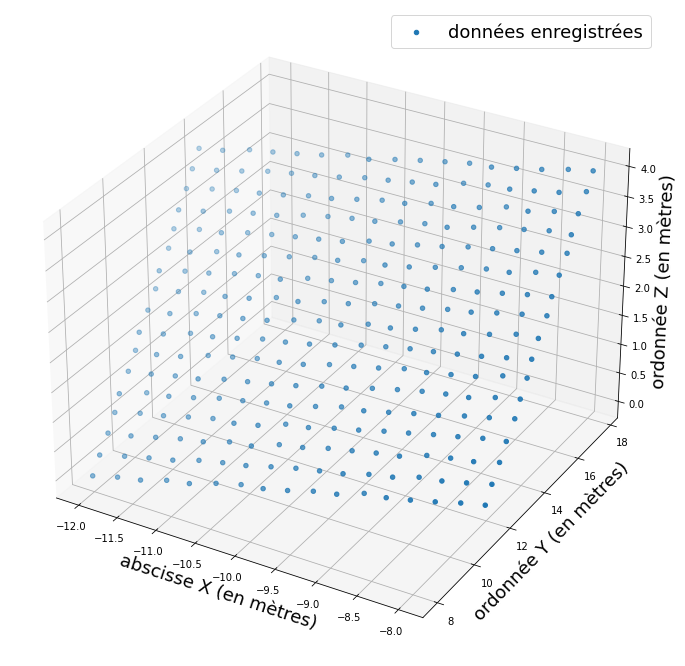

In [30]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection = '3d')
ax.scatter(X,Y,Z, label="données enregistrées")
ax.set_xlabel('abscisse X (en mètres)', fontsize=18)
ax.set_ylabel('ordonnée Y (en mètres)', fontsize=18)
ax.set_zlabel('ordonnée Z (en mètres)', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()

***


###  ***Modélisation envisagée***  
La visualisation graphique des données invite à rechercher une modélisation de la relation entre les 3 coordonnées $(\,X\,,\,Y\,,\,Z\,)$ de chaque point du nuage de points par l'équation d'un plan : 
$$a\,X+b\,Y+c\,Z+d=0 \Longleftrightarrow X+b_1\,Y+c_1\,Z+d_1=0$$

In [31]:
V = X
M = -np.stack((Y, Z, np.ones(len(X))), axis=1)
Theta = np.linalg.pinv(M.T @ M) @ M.T @ V
# 2) l'abscisse X prédite par ce modèle à partir des données Y et Z, que vous nommerez hatX
hatX = M @ Theta

#### Visualisation graphique

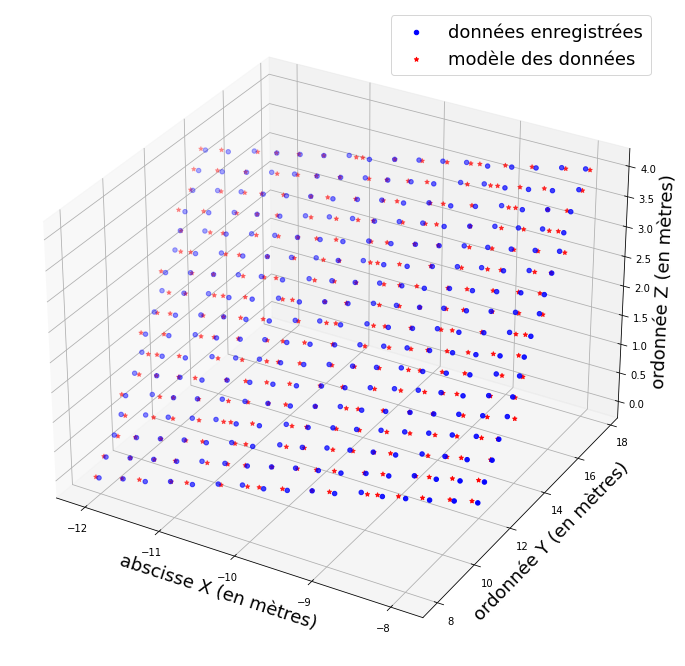

In [32]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection = '3d')
ax.scatter(X,Y,Z, c='b', label="données enregistrées")
ax.scatter(hatX,Y,Z, c='r',marker="*", label="modèle des données")
ax.set_xlabel('abscisse X (en mètres)', fontsize=18)
ax.set_ylabel('ordonnée Y (en mètres)', fontsize=18)
ax.set_zlabel('ordonnée Z (en mètres)', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()

***


###  ***Exploitation du modèle***  
#### Calcul de l'angle avec la verticale

In [33]:
# Calculer ici l'angle du plan par rapport à la verticale
# VectNorm = [1, b', c'].T = [1, Theta[0], Theta[1]].T
Pz = Theta[1] / (np.sqrt( 1 + Theta[0]**2 + Theta[1]**2))
alpha = np.arcsin(Pz)
print(f"La valeur de angle {alpha*180/np.pi}")
# Calculer ici l'angle du plan par rapport à la verticale

La valeur de angle 45.00927955451533


#### Calcul de la distance au plan obstacle dans le plan du sol

In [34]:
# intersection entre le plan du sol et le plan est une droite de points z = 0
# X + b' * Y + d' = 0
print(f"la distance au plan auniveau du sol: {-Theta[2]/np.sqrt(Theta[0]**2 + 1)}")# Calculer ici la distance au plan au niveau du sol

la distance au plan auniveau du sol: -14.137764599787701
